In [2]:
!pip install pyspark

     |████████████████████████████████| 212.3MB 67kB/s 
     |████████████████████████████████| 204kB 19.4MB/s 
  Created wheel for pyspark: filename=pyspark-3.1.1-py2.py3-none-any.whl size=212767604 sha256=2974f40c089e8d8a0eb3347a02ca8b5f1884d42daa8044de21a67524d4736732
  Stored in directory: /root/.cache/pip/wheels/0b/90/c0/01de724414ef122bd05f056541fb6a0ecf47c7ca655f8b3c0f
Successfully built pyspark


In [5]:
from pyspark.sql import SparkSession

In [6]:
spark = SparkSession.builder.getOrCreate()

In [16]:
listening_df = spark.read.csv('listenings.csv', inferSchema=True, header=True)

In [13]:
listening_df.printSchema()

root
 |-- user_id: string (nullable = true)
 |-- date: long (nullable = true)
 |-- track: string (nullable = true)
 |-- artist: string (nullable = true)
 |-- album: string (nullable = true)



In [17]:
listening_df.show()

+-----------+-------------+--------------------+---------------+--------------------+
|    user_id|         date|               track|         artist|               album|
+-----------+-------------+--------------------+---------------+--------------------+
|000Silenced|1299680100000|           Price Tag|       Jessie J|         Who You Are|
|000Silenced|1299679920000|Price Tag (Acoust...|       Jessie J|           Price Tag|
|000Silenced|1299679440000|Be Mine! (Ballad ...|          Robyn|            Be Mine!|
|000Silenced|1299679200000|            Acapella|          Kelis|            Acapella|
|000Silenced|1299675660000|   I'm Not Invisible|      The Tease|   I'm Not Invisible|
|000Silenced|1297511400000|Bounce (Feat NORE...|       MSTRKRFT|         Fist of God|
|000Silenced|1294498440000|Don't Stop The Mu...|        Rihanna|Addicted 2 Bassli...|
|000Silenced|1292438340000|               ObZen|      Meshuggah|               ObZen|
|000Silenced|1292437740000|   Yama's Messengers|      

In [19]:
listening_df = listening_df.drop('date')

In [26]:
shape = (listening_df.count(), len(listening_df.columns))
print(shape[0], shape[1])

1567300 4


In [25]:
listening_df = listening_df.na.drop()

In [27]:
q0 = listening_df.select('artist', 'track')
q0.show()

+---------------+--------------------+
|         artist|               track|
+---------------+--------------------+
|       Jessie J|           Price Tag|
|       Jessie J|Price Tag (Acoust...|
|          Robyn|Be Mine! (Ballad ...|
|          Kelis|            Acapella|
|      The Tease|   I'm Not Invisible|
|       MSTRKRFT|Bounce (Feat NORE...|
|        Rihanna|Don't Stop The Mu...|
|      Meshuggah|               ObZen|
|         Gojira|   Yama's Messengers|
|   Napalm Death|On the Brink of E...|
|   Napalm Death|On the Brink of E...|
|   Napalm Death|        In Deference|
|    Decapitated|      Post(?)organic|
|   Dom & Roland|        Mind Feeders|
|Cannibal Corpse|Necrosadistic War...|
|   Dom & Roland|     Dance All Night|
|   Dom & Roland|          Late Night|
|   Dom & Roland|          Freak Seen|
|   Dom & Roland|Paradrenasite (Hi...|
|   Dom & Roland|               Rhino|
+---------------+--------------------+
only showing top 20 rows



In [31]:
q1 = listening_df.select('*').filter(listening_df.artist == 'Gojira')
q1.show()

+-------------+--------------------+------+--------------------+
|      user_id|               track|artist|               album|
+-------------+--------------------+------+--------------------+
|  000Silenced|   Yama's Messengers|Gojira|The Way of All Flesh|
|   A3sahaettr|The Heaviest Matt...|Gojira| From Mars to Sirius|
|   A3sahaettr|        From The Sky|Gojira| From Mars to Sirius|
|    A5HL3Y123|    Esoteric Surgery|Gojira|The Way of All Flesh|
|    A5HL3Y123|    The Art of Dying|Gojira|The Way of All Flesh|
|      abanner|                  04|Gojira|     Terra Incognita|
|     Abbeyb37|             The Axe|Gojira|    L'Enfant Sauvage|
|     Abbeyb37|    L'Enfant sauvage|Gojira|    L'Enfant Sauvage|
|     Abbeyb37|            Explosia|Gojira|    L'Enfant Sauvage|
|     acaetion|       Flying Whales|Gojira| From Mars to Sirius|
|  acidbath_34|        From The Sky|Gojira| From Mars to Sirius|
|adam_crompton|            The Fall|Gojira|L'Enfant Sauvage ...|
| AdamJohnLowe|         L

In [57]:
from pyspark.sql.functions import count, desc, col

q2 = listening_df.select('user_id').filter(listening_df.artist == 'Gojira').groupby('user_id').agg(count('user_id').alias('count')).limit(10)
q2.show()

+---------------+-----+
|        user_id|count|
+---------------+-----+
|     A3sahaettr|    2|
|        babyist|    1|
|  agirloncesaid|    2|
|bluesformeister|    2|
|      athomas21|    1|
| blitzalchemist|    1|
|Bionic_Commando|    1|
|      A5HL3Y123|    2|
|    BlackenedUK|   11|
|  AddictOfMusic|   14|
+---------------+-----+



In [46]:
q3 = listening_df.select('artist', 'track').groupby('artist', 'track').agg(count('*').alias('count')).orderBy(desc('count'))
q3.show()

+--------------------+------------------+-----+
|              artist|             track|count|
+--------------------+------------------+-----+
|                Zayn|        PILLOWTALK|  442|
|       Justin Bieber|             Sorry|  410|
|            Bon Iver|       Skinny Love|  383|
|      Arctic Monkeys|  Do I Wanna Know?|  368|
|            Bon Iver|          Holocene|  347|
|            Bastille|           Pompeii|  342|
|             Rihanna|              Work|  337|
|           Lady Gaga|       Bad Romance|  330|
|                 Sia|        Chandelier|  325|
|       Justin Bieber| What Do You Mean?|  308|
|       Justin Bieber|     Love Yourself|  307|
|Two Door Cinema Club|     What You Know|  290|
|          The Weeknd|Can't Feel My Face|  285|
|              Hozier| Take Me to Church|  282|
|      Mumford & Sons|   Little Lion Man|  281|
|      Mumford & Sons|          The Cave|  279|
|       Fleetwood Mac|   Go Your Own Way|  278|
|               Adele|             Hello

In [48]:
q4 = listening_df.select('artist', 'track').filter(listening_df.artist == 'Rihanna').groupby('artist', 'track').agg(count('*').alias('count')).orderBy(desc('count'))
q4.show()

+-------+--------------------+-----+
| artist|               track|count|
+-------+--------------------+-----+
|Rihanna|                Work|  337|
|Rihanna|We Found Love (fe...|  199|
|Rihanna|            Rude Boy|  147|
|Rihanna|            Diamonds|  145|
|Rihanna|Only Girl (In the...|  139|
|Rihanna|                 S&M|  131|
|Rihanna|   Same Ol’ Mistakes|  105|
|Rihanna|      Kiss it Better|  103|
|Rihanna| Where Have You Been|  102|
|Rihanna|           Needed Me|   96|
|Rihanna|   Work (feat Drake)|   95|
|Rihanna|Bitch Better Have...|   93|
|Rihanna|           Desperado|   92|
|Rihanna|       Consideration|   87|
|Rihanna|         James Joint|   85|
|Rihanna|          You Da One|   82|
|Rihanna|     FourFiveSeconds|   75|
|Rihanna|   Love On The Brain|   71|
|Rihanna|    Russian Roulette|   71|
|Rihanna|Cheers (Drink to ...|   70|
+-------+--------------------+-----+
only showing top 20 rows



In [49]:
genre_df = spark.read.csv('genre.csv', inferSchema=True, header=True)
genre_df.show()

+--------------------+-----+
|              artist|genre|
+--------------------+-----+
|                Muse| rock|
|             Nirvana| rock|
|            Bon Jovi| rock|
|          The Police| rock|
|                Kiss| rock|
|       Guns N' Roses| rock|
|         Rusted Root| rock|
|Katrina and the W...|  pop|
|         The Beatles| rock|
|        Hall & Oates|  pop|
|        Otis Redding| soul|
|         Marvin Gaye| soul|
|     The Cranberries| rock|
|            Survivor| rock|
|       Fleetwood Mac|blues|
|           Radiohead| rock|
|                Toto| rock|
|                  U2| rock|
|Creedence Clearwa...| rock|
|                 REM| rock|
+--------------------+-----+
only showing top 20 rows



In [50]:
genre_df.printSchema()

root
 |-- artist: string (nullable = true)
 |-- genre: string (nullable = true)



In [51]:
data = listening_df.join(genre_df, how='inner', on=['artist'])
data.show()

+------------+-----------+--------------------+--------------------+--------------------+
|      artist|    user_id|               track|               album|               genre|
+------------+-----------+--------------------+--------------------+--------------------+
|    Jessie J|000Silenced|           Price Tag|         Who You Are| Ariana Grande & ...|
|    Jessie J|000Silenced|           Price Tag|         Who You Are| Jhene Aiko & Rixton|
|    Jessie J|000Silenced|           Price Tag|         Who You Are| Nicki Minaj & Ar...|
|    Jessie J|000Silenced|           Price Tag|         Who You Are|                 pop|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag| Ariana Grande & ...|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag| Jhene Aiko & Rixton|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag| Nicki Minaj & Ar...|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag|                 pop|
|       Ro

In [53]:
q6 = data.select('user_id').filter(data.genre == 'pop').groupby('user_id').agg(count('*').alias('count')).orderBy(desc('count')).limit(10)
q6.show()

+--------------+-----+
|       user_id|count|
+--------------+-----+
|       01Green|  496|
|    BIGBANG186|  227|
|   aboylike_me|  200|
|    addywalter|  199|
| artistic-leaf|  199|
|       beth182|  197|
|BeatriceCarver|  196|
|    angelsmith|  193|
|  BlueKnockOut|  193|
|     Braverism|  191|
+--------------+-----+



In [55]:
q7 = data.select('genre').groupby('genre').agg(count('*').alias('count')).orderBy(desc('count')).limit(10)
q7.show()

+----------+------+
|     genre| count|
+----------+------+
|      rock|300626|
|       pop|175792|
|electronic| 63445|
|   hip hop| 58745|
|      folk| 51310|
|indie rock| 51263|
|      punk| 44359|
|       r&b| 41002|
|      jazz| 25379|
|     indie| 24423|
+----------+------+



In [66]:
q8 = genre_df.select('genre').filter( (col('genre') == 'pop') | (col('genre') == 'rock') | (col('genre') == 'metal') | (col('genre') == 'hip hop')).groupby('genre').agg(count('genre').alias('count'))
q8.show()

+-------+-----+
|  genre|count|
+-------+-----+
|    pop| 6960|
|hip hop| 4288|
|  metal| 1854|
|   rock| 9066|
+-------+-----+



In [70]:
q8_list = q8.collect()

labels = [row['genre'] for row in q8_list]
counts = [row['count'] for row in q8_list]

print(labels)
print(counts)

['pop', 'hip hop', 'metal', 'rock']
[6960, 4288, 1854, 9066]


<BarContainer object of 4 artists>

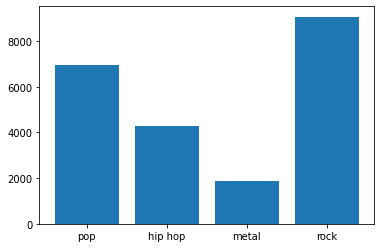

In [71]:
import matplotlib.pyplot as plt

plt.bar(labels, counts)